In [1]:
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import matplotlib.patches
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
from os import listdir
import warnings

warnings.filterwarnings('ignore')

Descomprime los ZIP y descarga los Csv

In [2]:
with open('folder.txt', 'r') as folder:
    lines = folder.readlines()
    
folder_archivos =  ' '.join(lines)

csv_files = []

In [3]:
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

csv_files = [l for l in find_csv_filenames(folder_archivos, suffix=".csv" ) if 'autos' in l]

In [4]:
with open('urls.txt', 'r') as folder_urls:
    lines_urls = folder_urls.readlines()

if len(csv_files) == 0:
    zipurls = lines_urls

    for zipurl in zipurls:
        with urlopen(zipurl) as zipresp:
            with ZipFile(BytesIO(zipresp.read())) as zfile:
                zfile.extractall(folder_archivos)

Lee todos los Csv de la carpeta

In [5]:
list_data_frames = []

for file in csv_files:
    df_new = pd.read_csv(file)
    list_data_frames.append(df_new)

In [6]:
df = pd.concat(list_data_frames, ignore_index=True)

df.shape

(7414431, 27)

In [7]:
df.head(6)

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_indec_id,titular_pais_nacimiento_indec_id,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,TRANSFERENCIA NACIONAL,2018-09-06,1999-07-08,1001,ADROGUE Nº 1,Buenos Aires,Nacional,1999.0,NaN,SEDAN,...,VILLA LA FLORIDA,BUENOS AIRES,Masculino,1995.0,Argentina,100,6.0,ARG,NaN,NaN
1,TRANSFERENCIA NACIONAL,2018-09-19,1994-07-05,1001,ADROGUE Nº 1,Buenos Aires,Nacional,1994.0,NaN,BERLINA 5 PTAS,...,BURZACO,BUENOS AIRES,Masculino,1965.0,Argentina,100,6.0,ARG,NaN,NaN
2,TRANSFERENCIA NACIONAL,2018-09-24,2008-06-04,1001,ADROGUE Nº 1,Buenos Aires,Nacional,2008.0,NaN,FURGON 600,...,VIRREY DEL PINO,BUENOS AIRES,Masculino,1990.0,Argentina,100,6.0,ARG,NaN,NaN
3,TRANSFERENCIA NACIONAL,2018-09-28,2009-10-13,1001,ADROGUE Nº 1,Buenos Aires,Nacional,2009.0,NaN,FURGON 600,...,LONGCHAMPS,BUENOS AIRES,Masculino,1963.0,Argentina,100,6.0,ARG,NaN,NaN
4,TRANSFERENCIA NACIONAL,2018-09-28,1979-05-30,1001,ADROGUE Nº 1,Buenos Aires,Nacional,1979.0,NaN,MICROOMNIBUS,...,LA BANDA PADILLA,BUENOS AIRES,Masculino,1971.0,Argentina,100,6.0,ARG,NaN,NaN
5,TRANSFERENCIA NACIONAL,2018-09-28,1979-05-30,1001,ADROGUE Nº 1,Buenos Aires,Nacional,1979.0,NaN,MICROOMNIBUS,...,C.AUTONOMA DE BS.AS,BUENOS AIRES,No aplica,1994.0,No aplica,100,6.0,NaN,NaN,NaN


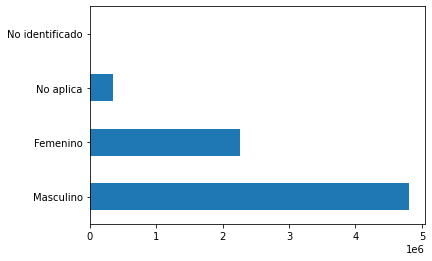

In [11]:
df.titular_genero.value_counts().plot(kind='barh');

In [12]:
df["tramite_fecha"] = pd.to_datetime(df["tramite_fecha"])

df = df.pivot_table(index='tramite_fecha',
               columns='registro_seccional_provincia',
               aggfunc=len,
               fill_value=0)

df.columns = df.columns.droplevel(0) 
df.columns.name = None              
df = df.reset_index()    

df = df.loc[:,~df.apply(lambda x: x.duplicated(),axis=1).all()].copy()


df.head(5)

,tramite_fecha,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad Autónoma de Bs.As.,Corrientes,Córdoba,Entre Ríos,Formosa,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tierra del Fuego,Tucumán
0,2018-01-02,2719,43,94,145,594,178,877,271,44,...,123,182,130,89,106,70,724,74,39,157
1,2018-01-03,2809,45,141,134,672,184,737,285,42,...,141,182,69,95,112,49,623,51,41,167
2,2018-01-04,2857,30,121,139,714,157,760,286,43,...,163,169,118,108,110,81,689,68,50,182
3,2018-01-05,2884,46,122,162,757,179,838,300,56,...,161,171,103,121,116,72,643,71,55,149
4,2018-01-06,7,0,0,0,0,0,0,0,0,...,0,13,5,0,0,6,0,0,0,0


In [ ]:
#df_dolar = pd.read_csv('dolarfinal.csv')

#df_dolar.head(5)

In [ ]:
#df.set_index('tramite_fecha', inplace = True)

In [ ]:
#df_dolar.set_index('Fecha', inplace = True)

In [ ]:
#df = pd.merge(df, df_dolar, left_index=True, right_index=True)

In [13]:
df["sum"] = df[df.columns[1:]].sum(axis=1)

In [14]:
df["sum"].describe()

count    1315.000000
mean     5638.350570
std      2798.529663
min         1.000000
25%      6003.000000
50%      6866.000000
75%      7338.500000
max      8877.000000
Name: sum, dtype: float64

In [15]:
df = df[df['sum'] > 6000]

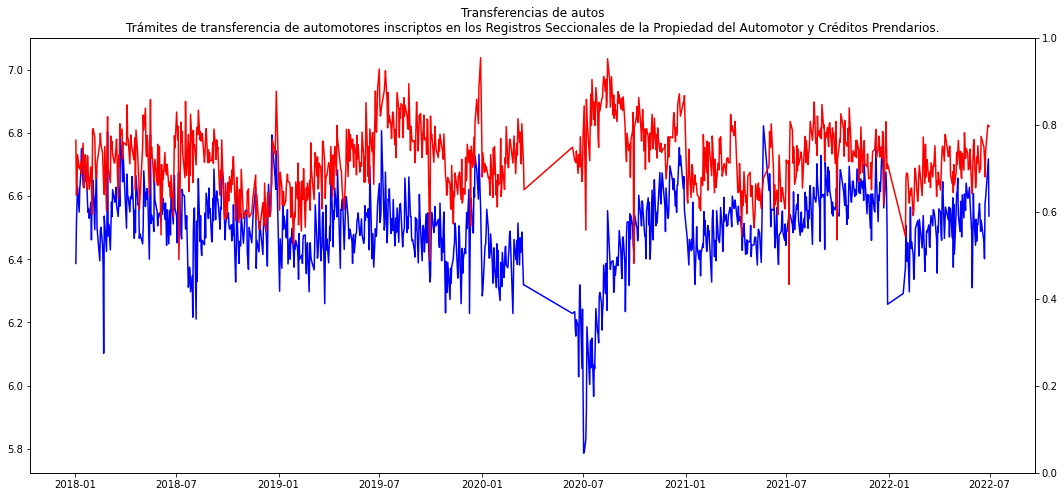

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (18,8)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(df['tramite_fecha'], np.log(df['Ciudad Autónoma de Bs.As.']), label="Ciudad Autónoma de Bs.As.",  c="b");
ax1.plot(df['tramite_fecha'], np.log(df['Córdoba']), label="Córdoba",  c="r");

plt.title('Transferencias de autos\nTrámites de transferencia de automotores inscriptos en los Registros Seccionales de la Propiedad del Automotor y Créditos Prendarios.')
plt.show()

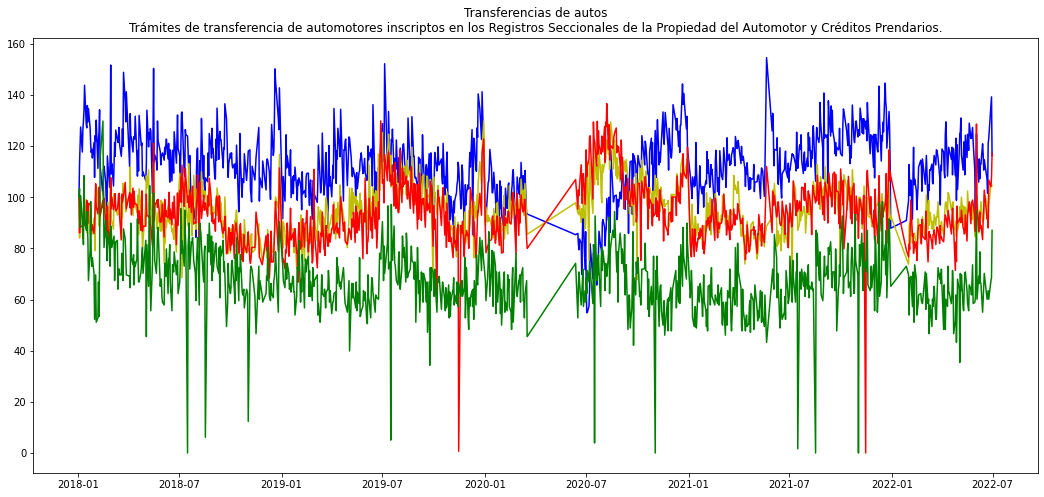

In [19]:
caba = df['Ciudad Autónoma de Bs.As.'].iloc[0]

df['caba_norm'] = df['Ciudad Autónoma de Bs.As.'].div(caba).mul(100)

cordoba = df['Córdoba'].iloc[0]

df['cordoba_norm'] = df['Córdoba'].div(cordoba).mul(100)

santafe = df['Santa Fe'].iloc[0]

df['santafe_norm'] = df['Santa Fe'].div(santafe).mul(100)

corrientes = df['Corrientes'].iloc[0]

df['corrientes_norm'] = df['Corrientes'].div(corrientes).mul(100)

fig = plt.figure()
ax  = plt.axes()

ax.plot(df['tramite_fecha'], df['caba_norm'], label="Ciudad Autónoma de Bs.As.",  c="b");
ax.plot(df['tramite_fecha'], df['cordoba_norm'], label="cordoba_norm",  c="y");
ax.plot(df['tramite_fecha'], df['santafe_norm'], label="santafe_norm",  c="r");
ax.plot(df['tramite_fecha'], df['corrientes_norm'], label="corrientes_norm",  c="g");
plt.title('Transferencias de autos\nTrámites de transferencia de automotores inscriptos en los Registros Seccionales de la Propiedad del Automotor y Créditos Prendarios.')
plt.show()

In [28]:
df['año'] = pd.DatetimeIndex(df['tramite_fecha']).year

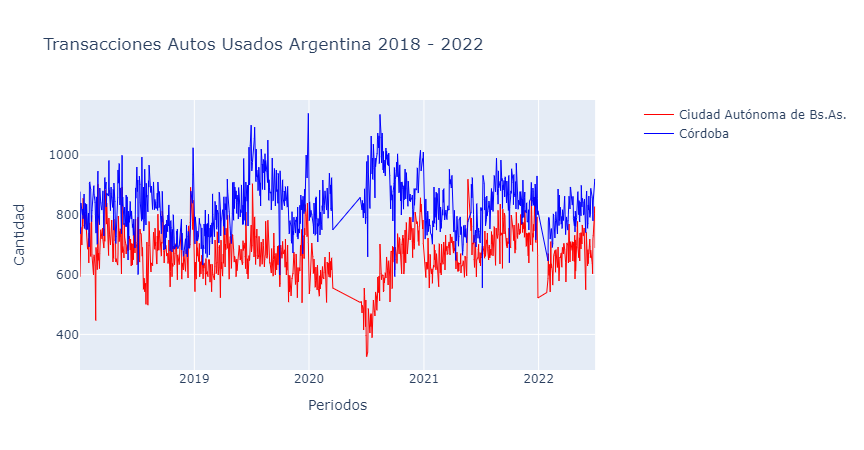

In [56]:
from plotly.subplots import make_subplots

subfig = make_subplots(specs=[[{"secondary_y": True}]])

fig  = px.line(df, x="tramite_fecha", y="Ciudad Autónoma de Bs.As.")

fig2 = px.line(df, x="tramite_fecha",y="Córdoba")

fig.update_layout(xaxis_rangeslider_visible=True)
fig.update_traces(showlegend=True,name='Ciudad Autónoma de Bs.As.',line_color='red', line_width=1)
fig2.update_traces(showlegend=True,name='Córdoba',line_color='#0000ff', line_width=1) #, yaxis="y2"
subfig.add_traces(fig.data + fig2.data)

subfig.layout.xaxis.title ="Periodos"
subfig.layout.yaxis.title ="Cantidad"
subfig.layout.yaxis2.title="Cantidad"
subfig.layout.title="Transacciones Autos Usados Argentina 2018 - 2022"

subfig.show()

In [57]:
columnas = []
values   = []

for i in range(len(df.drop(columns = ['sum', 'caba_norm', 'cordoba_norm', 'santafe_norm']).columns)):
    try:
        i += 1
        columnas.append(df.drop(columns = ['sum', 'caba_norm', 'cordoba_norm', 'santafe_norm']).columns[i])
        values.append(df[df.drop(columns = ['sum', 'caba_norm', 'cordoba_norm', 'santafe_norm']).columns[i]].sum())
    except:
        continue

df_group = pd.DataFrame({'indice': columnas, 'n' : values}).sort_values(by = 'n', ascending = False)

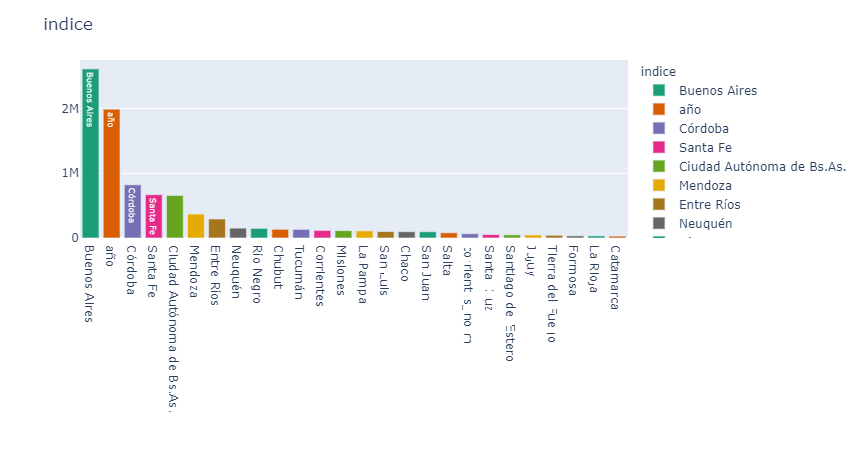

In [58]:
def plot_hbar(df, col, n):
    fig = px.bar(df, 
                 x=col, y="n", 
                 text=col, orientation='v', width=700,  color='indice',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()
    
plot_hbar(df_group, 'indice', 15)